<a href="https://colab.research.google.com/github/Oz314/essai/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import dataset
import pathlib
import os
!pip install tensorflow
import tensorflow as tf # Import tensorflow

data_dir = tf.keras.utils.get_file(
    "data.zip",
    "https://github.com/Oz314/essai/blob/main/data.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/data')
print(data_dir)
print(os.path.abspath(data_dir))

4405018/4405018 [==============================] - 0s 0us/step
/content/datasets/data
/content/datasets/data


In [3]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

197


In [4]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 197 files belonging to 2 classes.
Using 158 files for training.
Found 197 files belonging to 2 classes.
Using 39 files for validation.
['cat', 'dog']


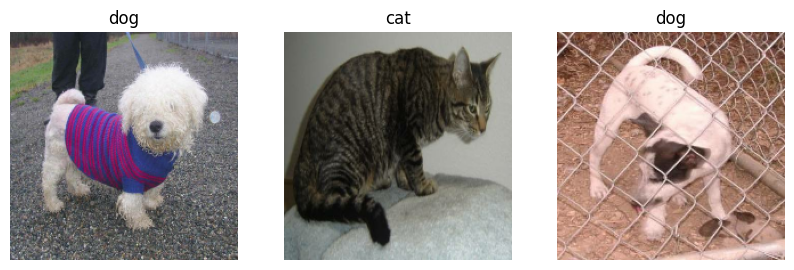

In [5]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
from tensorflow import keras # Import keras from tensorflow

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit(
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


53/53 [==============================] - 66s 1s/step - loss: 0.7188 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.4359
Epoch 2/2
53/53 [==============================] - 61s 1s/step - loss: 0.6940 - accuracy: 0.4494 - val_loss: 0.6936 - val_accuracy: 0.4359


In [8]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 47, 47, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 32)       

Saving chien-aime-chaleur-153225.jpg to chien-aime-chaleur-153225 (2).jpg


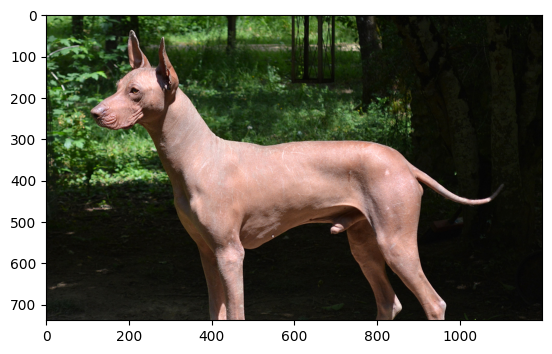

1/1 [==============================] - 0s 135ms/step
[0]
1/1 [==============================] - 0s 109ms/step
[[0.5020891  0.49791098]]
C'EST UN CHIEN !


In [14]:
!pip install opencv-python
import cv2 # Import the cv2 module
import numpy as np # Import numpy for array manipulation
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    # Use np.argmax to get predicted class index
    res = np.argmax(model.predict(img_to_predict), axis=-1)
    print(res) # Print predicted class index
    print(model.predict(img_to_predict)) # Print prediction probabilities
    if res == 1:
        #plt.imshow(cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)) # Assuming image_dog is defined elsewhere
        #plt.show()
        print("C'EST UN CHAT !")
    elif res == 0 :
        #plt.imshow(cv2.cvtColor(image_dog, cv2.COLOR_BGR2RGB)) # Assuming image_cat is defined elsewhere
        #plt.show()
        print("C'EST UN CHIEN !")

Error loading dog image. Check the file path.
Error loading cat image. Check the file path.
Skipping dog image due to loading error.
Skipping cat image due to loading error.
